# Introduction
Deep neural models based on Convolutional Neural Networks (CNNs) have enabled unprecedented breakthroughs
in a variety of computer vision tasks, image classification, object detection, image segmentation, image captioning and more. While these models enable superior performance, they considered to be a black boxes and hard to interpret.

**Why interpretability matters?**
>In order to build trust in intelligent
systems and move towards their meaningful integration into our everyday lives, it is clear that we must build ‘transparent’ models that have the ability to explain why they predict what they predict.


## APPROACH
Gradient-weighted Class Activation Mapping
(Grad-CAM), uses the gradients of any target concept (say
‘dog’ in a classification network or a sequence of words
in captioning network) flowing into the final convolutional
layer to produce a coarse localization map highlighting the
important regions in the image for predicting the concept.

To obtain the class discriminative localization map of width u and height v for any class c, we first compute the gradient of the score for the class c, yc (before the softmax) with respect to feature maps Ak of a convolutional layer.

![alt text](https://raw.githubusercontent.com/omarsayed7/Grad-CAM/master/imgs/fig1.JPG)

After calculating ak for the target class c, we perform a weighted combination of activation maps and follow it by ReLU.
![alt text](https://raw.githubusercontent.com/omarsayed7/Grad-CAM/master/imgs/fig2.JPG)

We will demonstrate this technique using the pre-trained resnet50 network in both Keras and PyTorch. 

# PyTorch Implementation

In [1]:
import torch
from torchvision import datasets, models, transforms
from torchsummary import summary 
from PIL import Image
import matplotlib.pyplot as plt
import cv2 
import numpy as np 

from grad_cam_pytorch import Torch_GradCam

In [2]:
model_res = models.resnet50(pretrained=True)
summary(model_res.cuda(), (3,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]           4,096
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]          16,384
      BatchNorm2d-12          [-1, 256, 64, 64]             512
           Conv2d-13          [-1, 256, 64, 64]          16,384
      BatchNorm2d-14          [-1, 256,

In [19]:
IMG_PATH = 'imgs/lion.jpg'
img = Image.open(IMG_PATH)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor(), normalize])
transformed_img = transform(img)
transformed_img = torch.unsqueeze(transformed_img,0)

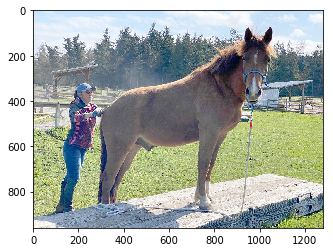

In [4]:
plt.imshow(img)

In [5]:
from grad_cam_pytorch import Torch_GradCam
model_res = models.resnet50(pretrained=True)
cam = Torch_GradCam(model_res,'layer4')

2048
Class ID: 225


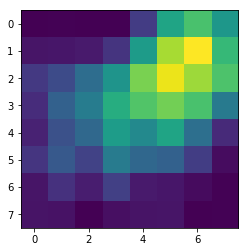

In [6]:
heatmap = cam.generate_heatmap(transformed_img)
s_map = cam.visualize_heatmap(heatmap, img_path=IMG_PATH)
print("Class ID:",cam.get_output_class())
plt.imshow(heatmap)

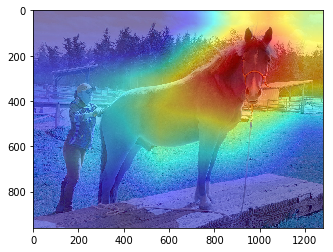

In [7]:
plt.imshow(s_map)

2048
Class ID: 817


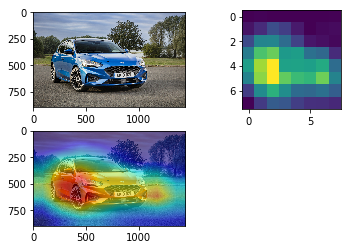

In [18]:
heatmap = cam.generate_heatmap(transformed_img)
s_map = cam.visualize_heatmap(heatmap, img_path=IMG_PATH)
print("Class ID:",cam.get_output_class())

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(heatmap)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(s_map)

2048
Class ID: 291


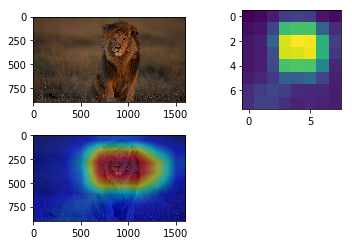

In [20]:
heatmap = cam.generate_heatmap(transformed_img)
s_map = cam.visualize_heatmap(heatmap, img_path=IMG_PATH)
print("Class ID:",cam.get_output_class())

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(heatmap)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(s_map)

# Keras Implementation 

`Note` before using the implementation of Keras make sure you restarted the kernel

In [1]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import keras.backend as K
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image
from grad_cam_keras import Keras_GradCam

K.clear_session()

model_k = ResNet50(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
model_k.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [2]:
IMG_PATH = 'imgs/lion.jpg'
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#shape (224,224,3)
img = cv2.resize(image, (224,224))
#shape (1,224,224,3)
img = np.expand_dims(img,axis=0)
#preprocess of the input using pre-processing function of Resnet50
transformed_img = preprocess_input(img)
print(transformed_img.shape)

(1, 224, 224, 3)


In [3]:
keras_cam = Keras_GradCam(model_k, 'activation_49')
heatmap= keras_cam.generate_heatmap(transformed_img)


s_map = keras_cam.visualize_heatmap(heatmap,IMG_PATH)

Instructions for updating:
Use tf.cast instead.


Class ID: 291


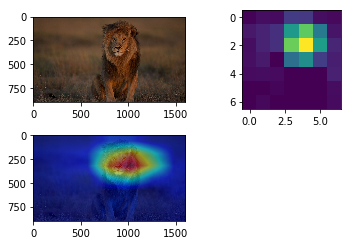

In [4]:
print("Class ID:",keras_cam.get_output_class())

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(heatmap)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(s_map)